In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from regressors import stats
from scipy.stats import kurtosis, skew, boxcox
from sklearn.kernel_ridge import KernelRidge

In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

# Missing Values

In [3]:
na_counts_train = train.isnull().sum()
na_counts_train[na_counts_train != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
na_counts_test = test.isnull().sum()
na_counts_test[na_counts_test != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [5]:
class DataCleaner:
    
    
    def __init__(self, train, test):
        self.train = train.copy()
        self.test = test.copy()
        
    
    def cleanAlley(self):
        self.train.loc[:,'Alley'] = self.train['Alley'].fillna('No_Alley_Access')
        self.test.loc[:,'Alley'] = self.test['Alley'].fillna('No_Alley_Access')
    
    
    def cleanBsmt(self):
        self.cleanBsmtQual()
        self.cleanBsmtCond()
        self.cleanBsmtExposure()
        self.cleanBsmtFinType1()
        self.cleanBsmtFinType2()
        self.cleanBsmtFinSF1()
        self.cleanBsmtFinSF2()
        self.cleanBsmtUnfSF()
        self.cleanTotalBsmtSF()
        self.cleanBsmtFullBath()
        self.cleanBsmtHalfBath()
    
    def cleanBsmtQual(self):
        self.train.loc[:,'BsmtQual'] = self.train['BsmtQual'].fillna('No_Basement')
        self.test.loc[:,'BsmtQual'] = self.test['BsmtQual'].fillna('No_Basement')
        
        
    def cleanBsmtCond(self):
        self.train.loc[:,'BsmtCond'] = self.train['BsmtCond'].fillna('No_Basement')
        self.test.loc[:,'BsmtCond'] = self.test['BsmtCond'].fillna('No_Basement')
        
    
    def cleanBsmtExposure(self):
        self.train.loc[:,'BsmtExposure'] = self.train['BsmtExposure'].fillna('No_Basement')
        self.test.loc[:,'BsmtExposure'] = self.test['BsmtExposure'].fillna('No_Basement')
        
        
    def cleanBsmtFinType1(self):
        self.train.loc[:,'BsmtFinType1'] = self.train['BsmtFinType1'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType1'] = self.test['BsmtFinType1'].fillna('No_Basement')

        
    def cleanBsmtFinType2(self):
        self.train.loc[:,'BsmtFinType2'] = self.train['BsmtFinType2'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType2'] = self.test['BsmtFinType2'].fillna('No_Basement')
        
        
    def cleanBsmtFinSF1(self):

        self.train.loc[:,'BsmtFinSF1'] = self.train['BsmtFinSF1'].fillna(0)
        self.test.loc[:,'BsmtFinSF1'] = self.test['BsmtFinSF1'].fillna(0)

        
    def cleanBsmtFinSF2(self):
        self.train.loc[:,'BsmtFinSF2'] = self.train['BsmtFinSF2'].fillna(0)
        self.test.loc[:,'BsmtFinSF2'] = self.test['BsmtFinSF2'].fillna(0)
        

    def cleanBsmtUnfSF(self):
        self.train.loc[:,'BsmtUnfSF'] = self.train['BsmtUnfSF'].fillna(0)
        self.test.loc[:,'BsmtUnfSF'] = self.test['BsmtUnfSF'].fillna(0)
        
        
    def cleanTotalBsmtSF(self):
        self.train.loc[:,'TotalBsmtSF'] = self.train['TotalBsmtSF'].fillna(0)   
        self.test.loc[:,'TotalBsmtSF'] = self.test['TotalBsmtSF'].fillna(0)
        
        
    def cleanBsmtFullBath(self):
        self.train.loc[:,'BsmtFullBath'] = self.train['BsmtFullBath'].fillna(0)
        self.test.loc[:,'BsmtFullBath'] = self.test['BsmtFullBath'].fillna(0)
        
    def cleanBsmtHalfBath(self):
        self.train.loc[:,'BsmtHalfBath'] = self.train['BsmtHalfBath'].fillna(0)
        self.test.loc[:,'BsmtHalfBath'] = self.test['BsmtHalfBath'].fillna(0)
    
    
    def cleanFireplaceQu(self):
        self.train.loc[:,'FireplaceQu'] = self.train['FireplaceQu'].fillna('No_Fireplace')
        self.test.loc[:,'FireplaceQu'] = self.test['FireplaceQu'].fillna('No_Fireplace')
    
    
    def cleanGarage(self):
        self.cleanGarageType()
        self.cleanGarageYrBlt()
        self.cleanGarageFinish()
        self.cleanGarageQual()
        self.cleanGarageCond()
        self.cleanGarageCars()
        self.cleanGarageArea()
        
        
    def cleanGarageType(self):
        self.train.loc[:,'GarageType'] = self.train['GarageType'].fillna('No_Garage')
        self.test.loc[:,'GarageType'] = self.test['GarageType'].fillna('No_Garage')
        
        
    def cleanGarageYrBlt(self):
        self.train.loc[:,'GarageYrBlt'] = self.train['GarageYrBlt'].fillna(0)
        self.test.loc[:,'GarageYrBlt'] = self.test['GarageYrBlt'].fillna(0)

        
    def cleanGarageFinish(self):
        self.train.loc[:,'GarageFinish'] = self.train['GarageFinish'].fillna('No_Garage')
        self.test.loc[:,'GarageFinish'] = self.test['GarageFinish'].fillna('No_Garage')
        
        
    def cleanGarageQual(self):
        self.train.loc[:,'GarageQual'] = self.train['GarageQual'].fillna('No_Garage')        
        self.test.loc[:,'GarageQual'] = self.test['GarageQual'].fillna('No_Garage')
        
          
    def cleanGarageCond(self):
        self.train.loc[:,'GarageCond'] = self.train['GarageCond'].fillna('No_Garage')        
        self.test.loc[:,'GarageCond'] = self.test['GarageCond'].fillna('No_Garage')
        
        
    def cleanGarageCars(self):
        self.train.loc[:,'GarageCars'] = self.train['GarageCars'].fillna(0)        
        self.test.loc[:,'GarageCars'] = self.test['GarageCars'].fillna(0)
        
        
        
    def cleanGarageArea(self):
        self.train.loc[:,'GarageArea'] = self.train['GarageArea'].fillna(0)        
        self.test.loc[:,'GarageArea'] = self.test['GarageArea'].fillna(0)
        
        
    def cleanPoolQC(self):
        self.train.loc[:,'PoolQC'] = self.train['PoolQC'].fillna('No_Pool')
        self.test.loc[:,'PoolQC'] = self.test['PoolQC'].fillna('No_Pool')
    
    
    def cleanFence(self):
        self.train.loc[:,'Fence'] = self.train['Fence'].fillna('No_Fence')
        self.test.loc[:,'Fence'] = self.test['Fence'].fillna('No_Fence')

    
    def cleanMiscFeature(self):
        self.train.loc[:,'MiscFeature'] = self.train['MiscFeature'].fillna('No_Misc_Feature')
        self.test.loc[:,'MiscFeature'] = self.test['MiscFeature'].fillna('No_Misc_Feature')
        
        
    def cleanMasVnrType(self):
        #self.imputeColumn('MasVnrType')
        self.train.loc[:,'MasVnrType'] = self.train['MasVnrType'].fillna('No_MasVnr')
        self.test.loc[:,'MasVnrType'] = self.test['MasVnrType'].fillna('No_MasVnr')

        
    
    def cleanMasVnrArea(self):
        #self.imputeColumn('MasVnrArea')
        self.train.loc[:,'MasVnrArea'] = self.train['MasVnrArea'].fillna(0)
        self.test.loc[:,'MasVnrArea'] = self.test['MasVnrArea'].fillna(0)
        
        
    def cleanMSSubClass(self):
        self.train.loc[:,'MSSubClass'] = self.train['MSSubClass'].astype('object')
        self.test.loc[:,'MSSubClass'] = self.test['MSSubClass'].astype('object')


    
    def cleanLotFrontage(self):
         self.imputeColumn('LotFrontage')
        
        
    def cleanElectrical(self):
        self.imputeColumn('Electrical')
        
        
    def cleanMSZoning(self):
        self.imputeColumn('MSZoning')
        
    def cleanUtilities(self):
        self.imputeColumn('Utilities')
        
        
    def cleanExterior1st(self):
        self.imputeColumn('Exterior1st')
        
    def cleanExterior2nd(self):
        self.imputeColumn('Exterior2nd')
        
    def cleanKitchenQual(self):
        self.imputeColumn('KitchenQual')
        
        
    def cleanFunctional(self):
        self.imputeColumn('Functional')
        
        
    def cleanSaleType(self):
        self.imputeColumn('SaleType')
        
        
    def imputeColumn(self, colName):
        train, test = self.dummify([colName])
        missing_train = train[train[colName].isnull()]
        train_na = train[train[colName].notnull()]
        missing_test = test[test[colName].isnull()]
        
        isMissingFeatureCol_Train = sum(missing_train.columns[missing_train.isnull().sum() != 0] != colName) == 0
        isMissingFeatureCol_Test = sum(missing_test.columns[missing_test.isnull().sum() != 0] != colName) == 0

        if (isMissingFeatureCol_Train) & (isMissingFeatureCol_Test):
            print('Dropping Rows')
            train_na = train[train[colName].notnull()]
            train_na = train_na.dropna()
            train_na_X = train_na.loc[:,train_na.columns.difference([colName,'SalePrice'])]
            train_na_y = train_na[colName]
            
            missing_train = missing_train.loc[:,missing_train.columns.difference([colName, 'SalePrice'])]
            missing_test = missing_test.loc[:,missing_test.columns.difference([colName, 'SalePrice'])]
             
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
                
            
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed  
        else:
            print('DroppingCols')
            colsWithNA = train_na.columns[train_na.isnull().sum() != 0].to_list()
            colsWithNA_Missing = missing_train.columns[missing_train.isnull().sum() != 0].to_list()
            targetCols = [colName,'SalePrice']
            colsToDrop = targetCols + colsWithNA + colsWithNA_Missing

            train_na_X = train_na.loc[:,train_na.columns.difference(colsToDrop)]
            train_na_y = train_na[colName]

            missing_train = missing_train.loc[:,missing_train.columns.difference(colsToDrop)]
            missing_test = missing_test.loc[:,missing_test.columns.difference(colsToDrop)]
            
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
        
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed
                
    def randomForestImputation(self, train_X, train_y, forestType, cv):
        
        if forestType == 'object':
            rf = RandomForestClassifier()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(confusion_matrix(predictions, y_test))
            print(accuracy_score(predictions, y_test))
            print(precision_score(predictions, y_test, average='weighted'))
            
        else:
            rf = RandomForestRegressor()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(pd.DataFrame(predictions,y_test))
            print(mean_squared_error(predictions, y_test))
        
        return rf
            
    '''
    def cleanAllColumns(self):
        self.cleanAlley()
        self.cleanBsmt()
        self.cleanElectrical()
        self.cleanFence()
        self.cleanFireplaceQu()
        self.cleanGarage()
        self.cleanMasVnrArea()
        self.cleanMasVnrType()
        self.cleanMiscFeature()
        self.cleanPoolQC()
        self.cleanMSZoning()
        self.cleanUtilities()
        self.cleanExterior1st()
        self.cleanExterior2nd()
        self.cleanKitchenQual()
        self.cleanFunctional()
        self.cleanSaleType()   
    '''

        
    def dummify(self, notCols):
        cat_cols = self.train.dtypes[self.train.dtypes == 'object'].index.to_list()
        
        try:
            for col in notCols:
                cat_cols.remove(col)
        except:
            print('Column not in category cols')
        
        dum_train = pd.DataFrame()
        dum_test = pd.DataFrame()
        dummies_train = []
        dummies_test = []
        for col in cat_cols:
            dum_train = pd.get_dummies(self.train[col], prefix=f'{col}Dummy', drop_first=True)
            dum_test = pd.get_dummies(self.test[col], prefix= f'{col}Dummy', drop_first=True)
            dummies_train.append(dum_train)
            dummies_test.append(dum_test)
            
        
        concat_dummies_train = pd.concat(dummies_train, axis=1)
        train = pd.concat([self.train, concat_dummies_train], axis=1)
        train = train.drop(cat_cols, axis=1)
       
        concat_dummies_test = pd.concat(dummies_test, axis=1)
        test = pd.concat([self.test, concat_dummies_test],axis=1)
        test = test.drop(cat_cols, axis=1)
        
        missingCols = set(train.columns) - set(test.columns)
        for col in missingCols:
            if col != 'SalePrice':
                test[col] = 0
                
        
        missingCols = set(test.columns) - set(train.columns)        
        for col in missingCols:
            train[col] = 0
            

        return [train, test]
    
    
    def ordinalEncode(self):
        ordCols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                   'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars','MoSold', 'YrSold','ExterQual','ExterCond',
                   'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual',
                    'GarageCond','PoolQC','Fence','LandSlope']
        
        full = pd.concat([self.train[ordCols], self.test[ordCols]],axis=0)
        
        ordEnc = OrdinalEncoder()
        ordEnc.fit(full)
        self.train[ordCols] = ordEnc.transform(self.train[ordCols])
        self.test[ordCols] = ordEnc.transform(self.test[ordCols])        
        
    def getCategoryColumns(self):
        catColsTrain = self.train.columns[self.train.dtypes == 'object']
        catColsTest = self.test.columns[self.test.dtypes == 'object']
        
        return [catColsTrain, catColsTest]
    
    def getNumericColumns(self):
        numColsTrain = self.train.columns[self.train.dtypes != 'object']
        numColsTest = self.test.columns[self.test.dtypes != 'object']
        
        return [numColsTrain, numColsTest]
        
    
            
            
        
        

In [6]:
cleaned = DataCleaner(train, test)

In [7]:
cleaned.cleanAlley()
cleaned.cleanBsmtQual()
cleaned.cleanBsmtCond()
cleaned.cleanBsmtExposure()
cleaned.cleanBsmtFinType1()
cleaned.cleanBsmtFinType2()
cleaned.cleanBsmtFinSF1()
cleaned.cleanBsmtFinSF2()
cleaned.cleanBsmtUnfSF()
cleaned.cleanMasVnrType()
cleaned.cleanMasVnrArea()
cleaned.cleanTotalBsmtSF()
cleaned.cleanBsmtHalfBath()
cleaned.cleanBsmtFullBath()
cleaned.cleanFireplaceQu()
cleaned.cleanGarageType()
cleaned.cleanGarageYrBlt()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageCond()
cleaned.cleanGarageCars()
cleaned.cleanGarageArea()
cleaned.cleanPoolQC()
cleaned.cleanFence()
cleaned.cleanMiscFeature()
cleaned.cleanMSSubClass()

In [8]:
cleaned.cleanElectrical()
cleaned.cleanMSZoning()
cleaned.cleanUtilities()
cleaned.cleanExterior1st()
cleaned.cleanExterior2nd()
cleaned.cleanKitchenQual()
cleaned.cleanFunctional()
cleaned.cleanSaleType()
cleaned.cleanLotFrontage()

Dropping Rows
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [ 18   5   1 216]]
0.9
1.0
DroppingCols
[[  0   0   0   0   0]
 [  0  11   0   2   0]
 [  0   0   0   0   0]
 [  2   1   0 218   8]
 [  4   0   1   7  38]]
0.9143835616438356
0.9354168470498924
DroppingCols
[[292]]
1.0
1.0
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0]
 [ 0  1  1  1 32  0  0  0  0  1  1]
 [ 2  0  0  1  0 32  0  0  0  1  1]
 [ 0  0  0  0  1  0 10  0  0  2  1]
 [ 0  0  0  0  0  1  0  2  0  1  0]
 [ 0  0  0  0  0  1  0  0 85  0  1]
 [ 2  0  1  0  0  1  1  2  0 30  4]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
0.8796680497925311
0.9313472288794412
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 

# EDA

In [9]:
trainCatCols, testCatCols = cleaned.getCategoryColumns()

In [10]:
trainNumCols, testNumCols = cleaned.getNumericColumns()

In [11]:
def getHistograms(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
            
        if col == 'GarageYrBlt':
            continue
        #print(rowIdx,colIdx)
        ax = sns.histplot(x=col, data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    

In [12]:
def getBoxplots(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        #print(rowIdx,colIdx)
        if col == 'GarageYrBlt':
            continue
        ax = sns.boxplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    

In [13]:
def getScatterplots(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        if col == 'GarageYrBlt':
            continue
        #print(rowIdx,colIdx)
        ax = sns.scatterplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        colIdx += 1
    f.tight_layout()

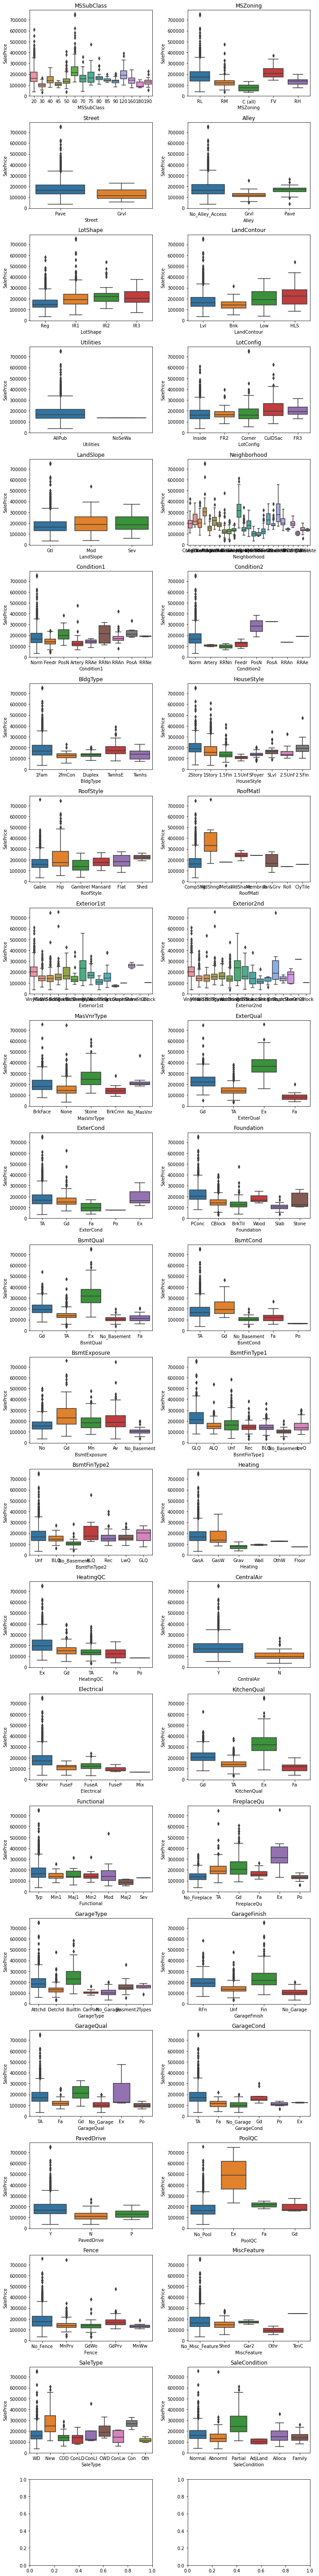

In [14]:
getBoxplots(trainCatCols, cleaned.train)

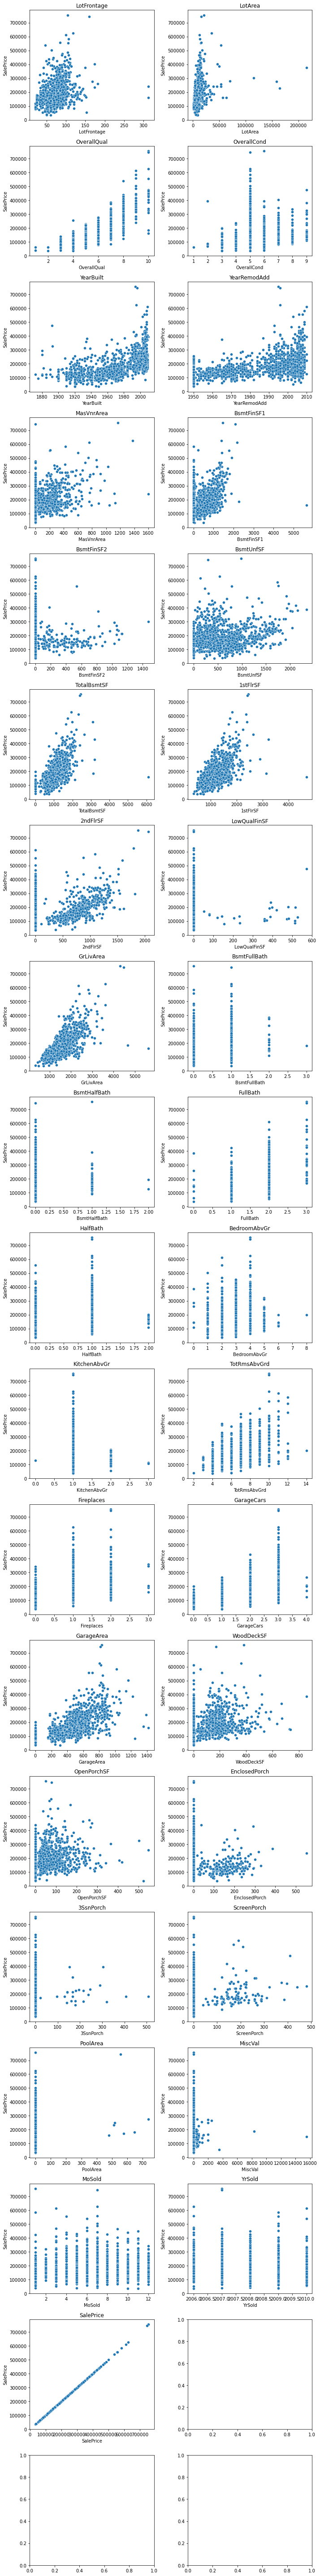

In [15]:
getScatterplots(trainNumCols, cleaned.train)

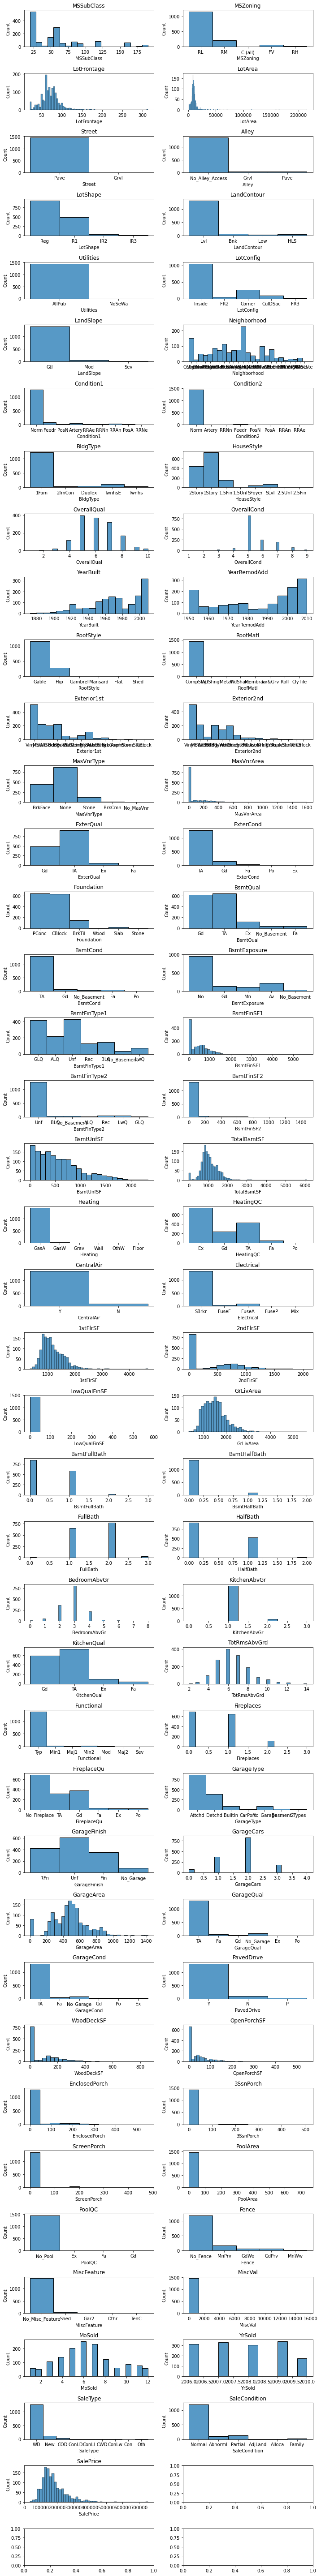

In [16]:
getHistograms(cleaned.train.columns, cleaned.train)

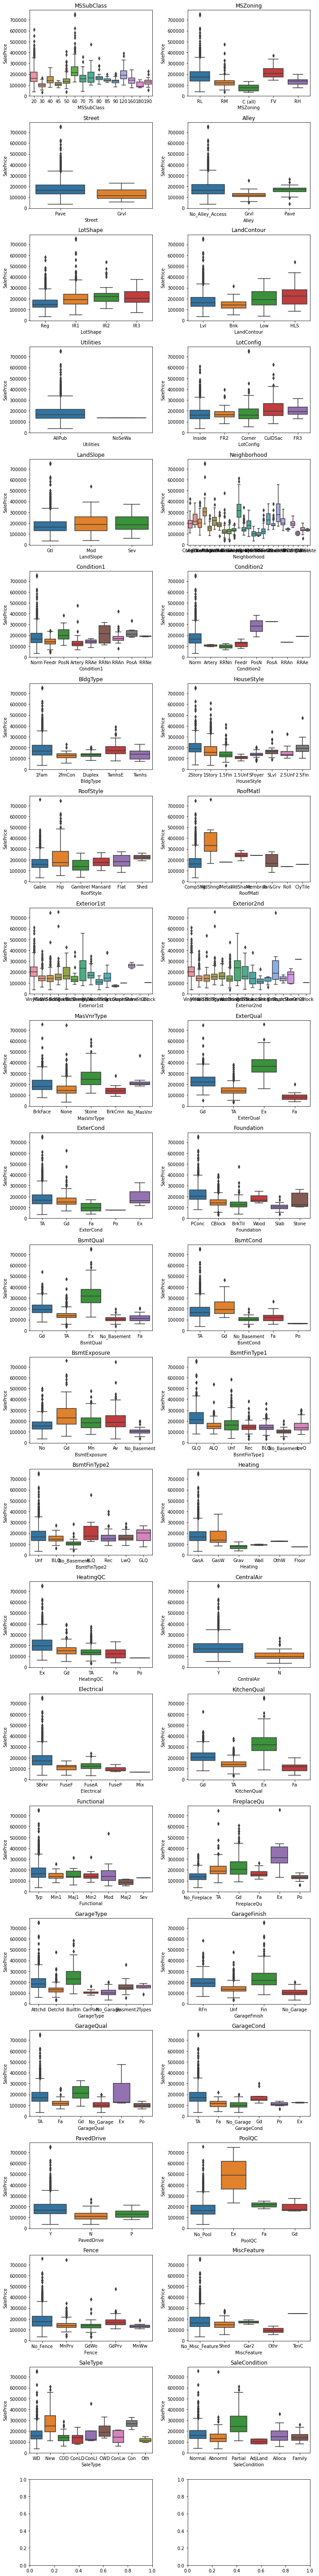

In [17]:
getBoxplots(testCatCols, cleaned.test)

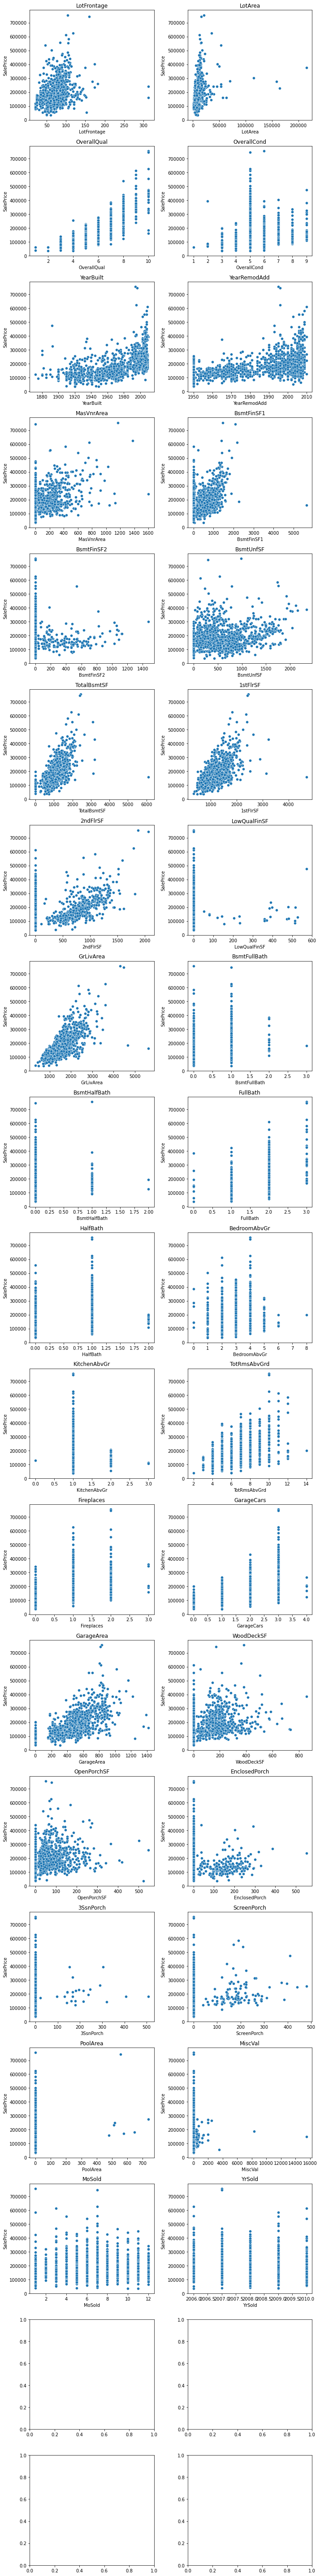

In [18]:
getScatterplots(testNumCols, cleaned.test)

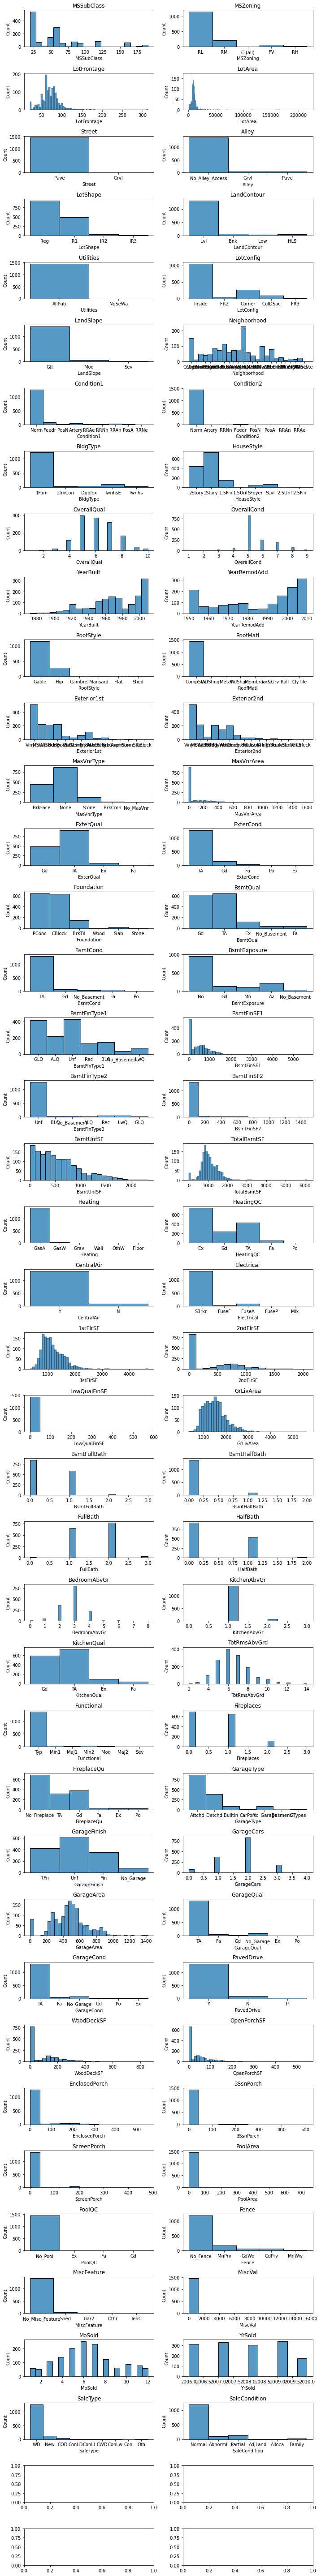

In [19]:
getHistograms(cleaned.test.columns, cleaned.test)

# Detecting Outliers

In [77]:
outliers = []
outliers.append(cleaned.train[cleaned.train['TotalBsmtSF'] > 6000].index.to_list())
outliers.append(cleaned.train[cleaned.train['1stFlrSF'] > 4000].index.to_list())
outliers.append(cleaned.train[(cleaned.train['GrLivArea'] > 4000) & (cleaned.train['SalePrice'] < 300000)].index.to_list())
outliers.append(cleaned.train[cleaned.train['BsmtFinSF1'] > 4000].index.to_list())
outliers.append(cleaned.train[cleaned.train['LotFrontage'] > 300].index.to_list())
outliers.append(cleaned.train[cleaned.train['LotArea'] > 100000].index.to_list())
#outliers = np.array(outliers)
outliers = [item for sublist in outliers for item in sublist]
outliers = list(set(outliers))

cleaned.train = cleaned.train[~cleaned.train.index.isin(outliers)]


# Feature Engineering

In [78]:
def addHasGarage(data):
    data['hasGarage'] = data['GarageType'].apply(lambda x: 0 if x=='No_Garage' else 1)

    
def addHasBsmt(data): 
    data['hasBsmt'] = data['BsmtQual'].apply(lambda x: 0 if x=='No_Basement' else 1)
    
def addHasAlley_Access(data): 
    data['hasAlley_Access'] = data['Alley'].apply(lambda x: 0 if x=='No_Alley_Access' else 1)
    
def addHasFireplace(data):
    data['hasFireplace'] = data['FireplaceQu'].apply(lambda x: 0 if x=='No_Fireplace' else 1)
    
def addHasPool(data):
    data['hasPool'] = data['PoolQC'].apply(lambda x: 0 if x=='No_Pool' else 1)

    
def addHasFence(data): 
    data['hasFence'] = data['Fence'].apply(lambda x: 0 if x=='No_Fence' else 1)

    
def addHasMisc_Feature(data):
    data['hasMisc_Feature'] = data['MiscFeature'].apply(lambda x: 0 if x=='No_Misc_Feature' else 1)
    
    
def addHasMasVnr(data):
    data['hasMasVnr'] = data['MasVnrType'].apply(lambda x: 0 if x=='No_MasVnr' else 1)

    
def getNumFloors(row):
    count = 0
    if row['TotalBsmtSF'] != 0:
        count = count + 1
    if row['1stFlrSF'] != 0:
        count = count + 1
    if row['2ndFlrSF'] != 0:
        count = count + 1
    return count


def addGrLivAreaHighQualitySF(data):
    data['GrLivAreaHighQualitySF'] = (data['1stFlrSF'] + data['2ndFlrSF']) - data['LowQualFinSF']
    
def addTotalIndoorSF(data):
    data['TotalIndoorSF'] = data['TotalBsmtSF'] + data['GrLivAreaHighQualitySF'] + data['GarageArea']

def addTotalOutdoorSF(data):
    data['TotalOutdoorSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch'] 
    + data['WoodDeckSF'] + data['PoolArea']
    

def addBsmtBaths(data):
    data['BsmtBaths'] = data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

def addBaths(data):
    data['Baths'] = data['FullBath'] + (0.5 * data['HalfBath'])
    
def addHasBeenRemodeled(data):
    data['hasBeenRemodeled'] = data.apply(lambda x: 0 if x['YearBuilt'] == x['YearRemodAdd'] else 1, axis=1)

    
def plotIndicators(data):
    f, axes = plt.subplots(9,1, figsize=(10,30))
    cols = ['Garage', 'Bsmt', 'Alley_Access','Fireplace', 'Pool', 'Fence', 'Misc_Feature', 'MasVnr', 'BeenRemodeled']

    
    for idx, col in enumerate(cols):
        grouped_garage = data.groupby(f'has{col}').mean().reset_index()
        ax = sns.barplot(grouped_garage[f'has{col}'],grouped_garage['SalePrice'], ax = axes[idx])

    
    


<ipython-input-78-8cb400325f57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hasGarage'] = data['GarageType'].apply(lambda x: 0 if x=='No_Garage' else 1)
<ipython-input-78-8cb400325f57>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hasBsmt'] = data['BsmtQual'].apply(lambda x: 0 if x=='No_Basement' else 1)
<ipython-input-78-8cb400325f57>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

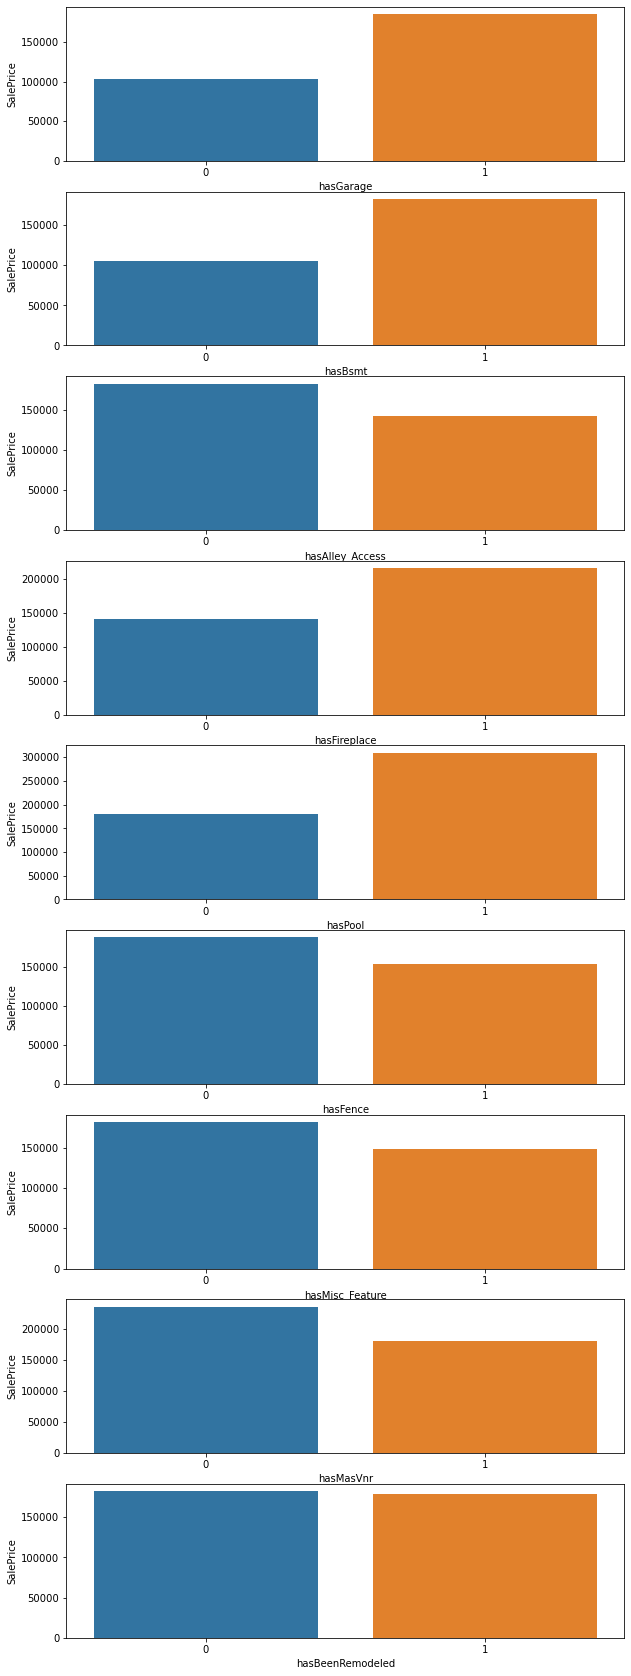

In [79]:
addHasGarage(cleaned.train)
addHasGarage(cleaned.test)

addHasBsmt(cleaned.train)
addHasBsmt(cleaned.test)

addHasAlley_Access(cleaned.train)
addHasAlley_Access(cleaned.test)

addHasFireplace(cleaned.train)
addHasFireplace(cleaned.test)

addHasPool(cleaned.train)
addHasPool(cleaned.test)

addHasFence(cleaned.train)
addHasFence(cleaned.test)

addHasMisc_Feature(cleaned.train)
addHasMisc_Feature(cleaned.test)


addHasMasVnr(cleaned.train)
addHasMasVnr(cleaned.test)


addGrLivAreaHighQualitySF(cleaned.train)
addGrLivAreaHighQualitySF(cleaned.test)


addTotalIndoorSF(cleaned.train)
addTotalIndoorSF(cleaned.test)


addTotalOutdoorSF(cleaned.train)
addTotalOutdoorSF(cleaned.test)


addBsmtBaths(cleaned.train)
addBsmtBaths(cleaned.test)


addBaths(cleaned.train)
addBaths(cleaned.test)


addHasBeenRemodeled(cleaned.train)
addHasBeenRemodeled(cleaned.test)

cleaned.train['NumFloors'] = cleaned.train.apply(getNumFloors, axis=1)
cleaned.test['NumFloors'] = cleaned.test.apply(getNumFloors, axis=1)

plotIndicators(cleaned.train)


In [80]:
'''
cleaned.train = cleaned.train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath','1stFlrSF','2ndFlrSF',
                                    'LowQualFinSF','GrLivArea','OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch',
                                   'WoodDeckSF', 'PoolArea','GrLivAreaHighQualitySF','GarageArea'], axis=1)
'''


"\ncleaned.train = cleaned.train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath','1stFlrSF','2ndFlrSF',\n                                    'LowQualFinSF','GrLivArea','OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch',\n                                   'WoodDeckSF', 'PoolArea','GrLivAreaHighQualitySF','GarageArea'], axis=1)\n"

In [81]:
# for col in trainNumCols:
#     print(col, '-' ,kurtosis(cleaned.train[col], bias = False, fisher=True))
#     if kurtosis(cleaned.train[col], bias = False, fisher=True) > 5:
#         kurtosis(cleaned.train[col], bias = False, fisher=True)

        

def logTransform(data):
    data['LotFrontage'] = np.log1p(data['LotFrontage'])
    data['LotArea'] = np.log1p(data['LotArea'])
    data['MasVnrArea'] = np.log1p(data['MasVnrArea'])
    data['BsmtFinSF1'] = np.log1p(data['BsmtFinSF1'])
    data['BsmtFinSF2'] = np.log1p(data['BsmtFinSF2'])
    data['TotalBsmtSF'] = np.log1p(data['TotalBsmtSF'])**5
    data['1stFlrSF'] = np.log1p(data['1stFlrSF'])
    data['LowQualFinSF'] = np.log1p(data['LowQualFinSF'])
    data['BsmtHalfBath'] = np.log1p(data['BsmtHalfBath'])
    data['KitchenAbvGr'] = np.log1p(data['KitchenAbvGr'])
    data['OpenPorchSF'] = np.log1p(data['OpenPorchSF'])
    data['EnclosedPorch'] = np.log1p(data['EnclosedPorch'])
    data['3SsnPorch'] = np.log1p(data['3SsnPorch'])
    data['ScreenPorch'] = np.log1p(data['ScreenPorch'])
    data['PoolArea'] = np.log1p(data['PoolArea'])
    data['MiscVal'] = np.log1p(data['MiscVal'])
    
    try:
        data['SalePrice'] = np.log1p(data['SalePrice'])
    except:
        pass


logTransform(cleaned.train)
logTransform(cleaned.test)




# Dummify Columns

In [82]:
cleaned.ordinalEncode()

In [83]:
trained, tested = cleaned.dummify(['ExternalQual','ExternalCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'
                                  'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual'
                                  'GarageCond','PoolQC','FenceQC','LandSlope'])

Column not in category cols


# Feature Selection

In [84]:
allZeroCols = trained.columns[(trained == 0).all()].to_list() + tested.columns[(tested == 0).all()].to_list()
trained = trained.drop(allZeroCols, axis=1)
tested = tested.drop(allZeroCols, axis=1)

In [85]:
X = trained.loc[:, trained.columns != 'SalePrice']
y = trained['SalePrice']

In [86]:
def get_k_best(k):
    k_best = SelectKBest(f_regression, k=k).fit(X, y)
    X[X.columns[k_best.get_support()]]

    k_best_scores = zip(X.columns, k_best.scores_)
    sorted_coef_importance = sorted(list(k_best_scores),key= lambda x: x[1],reverse=True)
    sorted_coef_importance

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_coef_importance[:k]], [x[1] for x in sorted_coef_importance[:k]])
    plt.xticks(rotation=90)

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


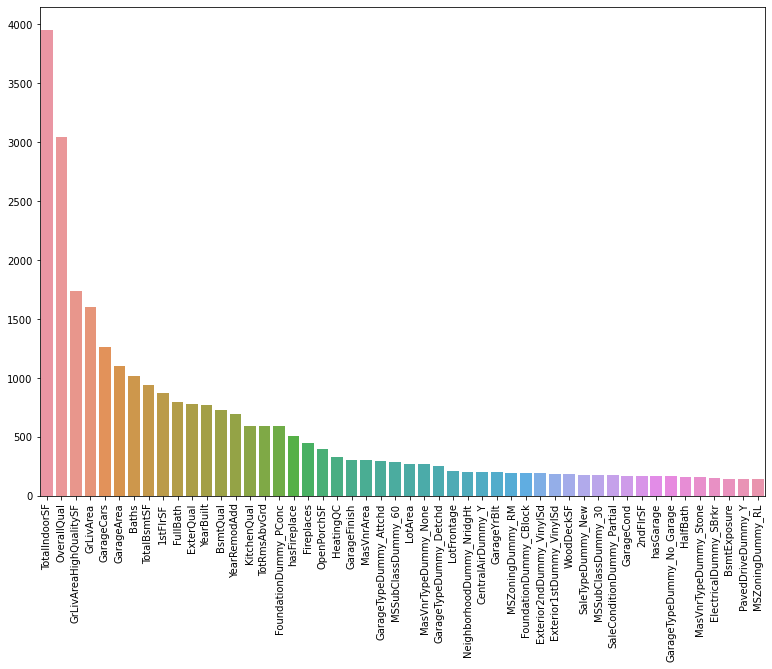

In [87]:
get_k_best(50)

# Correlation Matrix

In [88]:
non_dummy_cols = [col for col in X.columns if 'Dummy' not in col]

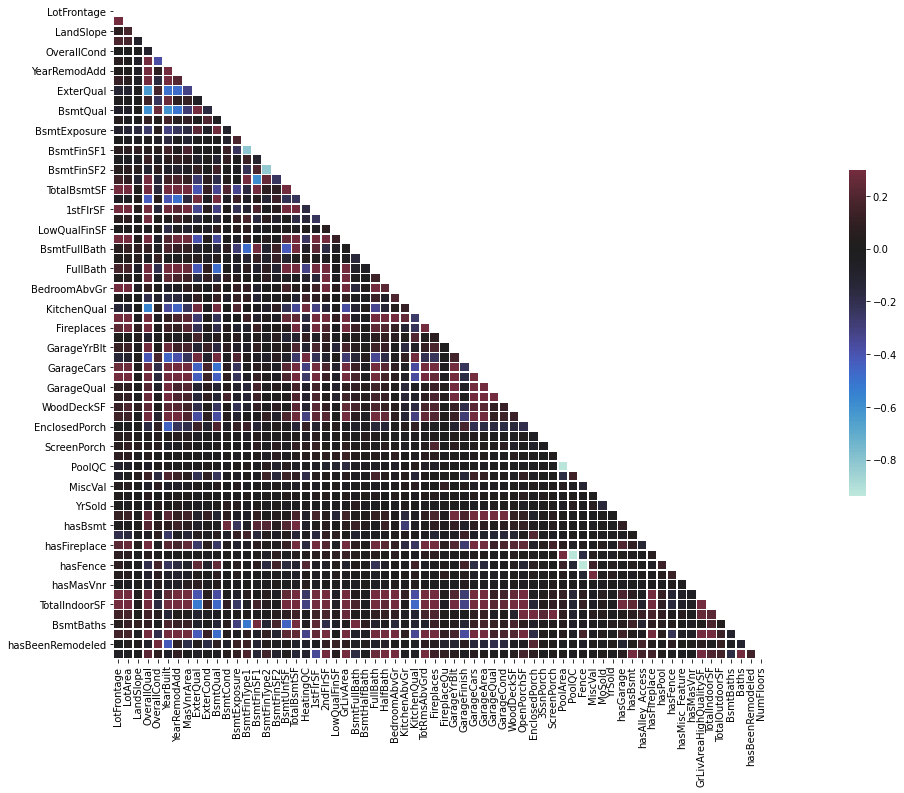

In [89]:
f, ax = plt.subplots(figsize=(30, 12))
corr = X[non_dummy_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [90]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_tri

<ipython-input-90-f910dd4be41c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


LotFrontage  LotArea  LandSlope  OverallQual  OverallCond  \
LotFrontage               NaN  0.74787   0.065969     0.182373    -0.008751   
LotArea                   NaN      NaN   0.165260     0.172935    -0.008751   
LandSlope                 NaN      NaN        NaN    -0.075320     0.004528   
OverallQual               NaN      NaN        NaN          NaN    -0.090469   
OverallCond               NaN      NaN        NaN          NaN          NaN   
...                       ...      ...        ...          ...          ...   
TotalOutdoorSF            NaN      NaN        NaN          NaN          NaN   
BsmtBaths                 NaN      NaN        NaN          NaN          NaN   
Baths                     NaN      NaN        NaN          NaN          NaN   
hasBeenRemodeled          NaN      NaN        NaN          NaN          NaN   
NumFloors                 NaN      NaN        NaN          NaN          NaN   

                  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  \
LotFrontage        0.059561      0.023725    0.116522  -0.122408   0.006369   
LotArea            0.021537      0.023282    0.061928  -0.102925  -0.011849   
LandSlope         -0.073840     -0.066025   -0.055212   0.013771  -0.007500   
OverallQual        0.571962      0.550185    0.406553  -0.630889   0.137783   
OverallCond       -0.375446      0.073195   -0.154184   0.168946  -0.228050   
...                     ...           ...         ...        ...        ...   
TotalOutdoorSF          NaN           NaN         NaN        NaN        NaN   
BsmtBaths               NaN           NaN         NaN        NaN        NaN   
Baths                   NaN           NaN         NaN        NaN        NaN   
hasBeenRemodeled        NaN           NaN         NaN        NaN        NaN   
NumFloors               NaN           NaN         NaN        NaN        NaN   

                  ...  hasFence  hasMisc_Feature  hasMasVnr  \
LotFrontage       ...  0.073480         0.042758  -0.006453   
LotArea           ...  0.010090         0.046671  -0.022798   
LandSlope         ... -0.033043         0.000945   0.016390   
OverallQual       ... -0.188643        -0.093693  -0.062508   
OverallCond       ...  0.171404         0.070270   0.046759   
...               ...       ...              ...        ...   
TotalOutdoorSF    ...       NaN              NaN        NaN   
BsmtBaths         ...       NaN              NaN        NaN   
Baths             ...       NaN              NaN        NaN   
hasBeenRemodeled  ...       NaN              NaN        NaN   
NumFloors         ...       NaN              NaN        NaN   

                  GrLivAreaHighQualitySF  TotalIndoorSF  TotalOutdoorSF  \
LotFrontage                     0.346316       0.412671        0.148169   
LotArea                         0.381351       0.434797        0.174076   
LandSlope                       0.027613       0.020198        0.018170   
OverallQual                     0.600843       0.707848        0.163853   
OverallCond                    -0.084929      -0.161327        0.059104   
...                                  ...            ...             ...   
TotalOutdoorSF                       NaN            NaN             NaN   
BsmtBaths                            NaN            NaN             NaN   
Baths                                NaN            NaN             NaN   
hasBeenRemodeled                     NaN            NaN             NaN   
NumFloors                            NaN            NaN             NaN   

                  BsmtBaths     Baths  hasBeenRemodeled  NumFloors  
LotFrontage        0.055673  0.162456         -0.007485  -0.057415  
LotArea            0.117615  0.164948          0.034875  -0.033592  
LandSlope          0.105849 -0.052120          0.031987  -0.006602  
OverallQual        0.095689  0.582666         -0.082335   0.226534  
OverallCond       -0.027298 -0.192245          0.308589   0.083122  
...                     ...       ...           

In [91]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
mostCorrelatedFeat = get_top_abs_correlations(corr, 500)
mostCorrelatedFeat

Top Absolute Correlations


PoolArea     hasPool                   0.999992
MiscVal      hasMisc_Feature           0.998615
GarageYrBlt  hasGarage                 0.998391
GrLivArea    GrLivAreaHighQualitySF    0.996625
PoolQC       hasPool                   0.995290
                                         ...   
ExterQual    GarageYrBlt               0.474522
hasFence     TotalIndoorSF             0.473788
MasVnrArea   hasAlley_Access           0.473611
1stFlrSF     EnclosedPorch             0.473373
LotFrontage  Baths                     0.472793
Length: 500, dtype: float64

In [92]:
dropped = set()
for pair in mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9]:
    corr1 = X[pair[0]].corr(y)
    corr2 = X[pair[1]].corr(y)
            
    if abs(corr1) > abs(corr2):
        dropped.add(pair[1])
    else:
        dropped.add(pair[0])


In [93]:
mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9]

MultiIndex([(              'PoolArea',                'hasPool'),
            (               'MiscVal',        'hasMisc_Feature'),
            (           'GarageYrBlt',              'hasGarage'),
            (             'GrLivArea', 'GrLivAreaHighQualitySF'),
            (                'PoolQC',                'hasPool'),
            (              'PoolArea',                 'PoolQC'),
            (                 'Fence',               'hasFence'),
            (            'GarageCars',             'GarageArea'),
            (          'BsmtFullBath',              'BsmtBaths'),
            (            'Fireplaces',           'hasFireplace'),
            (              'FullBath',                  'Baths'),
            (          'BsmtFinType1',             'BsmtFinSF1'),
            (             'GrLivArea',           'TotRmsAbvGrd'),
            (           'LotFrontage',                'LotArea'),
            (             'ExterQual',            'KitchenQual'),
          

In [94]:
allVars = set()
for i in range(len(mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9])):
    for j in range(2):
        allVars.add(mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9][i][j])

In [95]:
allVars

{'1stFlrSF',
 '2ndFlrSF',
 'Baths',
 'BsmtBaths',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtQual',
 'ExterQual',
 'Fence',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'GrLivArea',
 'GrLivAreaHighQualitySF',
 'HeatingQC',
 'KitchenQual',
 'LotArea',
 'LotFrontage',
 'MiscVal',
 'NumFloors',
 'OverallQual',
 'PoolArea',
 'PoolQC',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'TotalIndoorSF',
 'YearBuilt',
 'YearRemodAdd',
 'hasFence',
 'hasFireplace',
 'hasGarage',
 'hasMisc_Feature',
 'hasPool'}

In [96]:
remaining = allVars - dropped

In [97]:
remaining

{'2ndFlrSF',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFullBath',
 'GarageCond',
 'GarageYrBlt',
 'LotArea',
 'PoolQC',
 'TotalBsmtSF',
 'TotalIndoorSF',
 'YearBuilt',
 'hasFence',
 'hasFireplace',
 'hasMisc_Feature'}

In [98]:
#X = X.loc[:, X.columns.difference(dropped)]
#X = X.drop(['GarageCars','PoolQC','1stFlrSF','ExterQual','YearRemodAdd'], axis=1)

# Model Training

In [99]:
'''
split_indices = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, y):
    split_indices.append([train_index, test_index])
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
'''

'\nsplit_indices = []\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\nfor train_index, test_index in kf.split(X, y):\n    split_indices.append([train_index, test_index])\n    print("TRAIN:", len(train_index), "TEST:", len(test_index))\n    X_train, X_test = X.iloc[train_index], X.iloc[test_index]\n    y_train, y_test = y.iloc[train_index], y.iloc[test_index]\n'

# Gradient Boosting

In [100]:
#model = GradientBoostingRegressor()
model = GradientBoostingRegressor()
params = {'n_estimators': [100,200,300,500],
          'max_depth':[2,3,4,5],
          'max_features':['sqrt'],
          'subsample':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3], 
          'loss':['ls']}

gridGbr = GridSearchCV(model, param_grid=params, cv=5)
gridGbr.fit(X, y)
gridGbr.cv_results_

{'mean_fit_time': array([0.05724835, 0.0531569 , 0.05482121, 0.06687822, 0.05306406,
        0.05326767, 0.05695581, 0.04320664, 0.09133682, 0.10471778,
        0.10433917, 0.11463218, 0.12144599, 0.12109723, 0.11217985,
        0.10100884, 0.17942705, 0.20560942, 0.19864578, 0.19231997,
        0.17342267, 0.16446795, 0.14057641, 0.15011644, 0.25771542,
        0.3509912 , 0.33279681, 0.29255524, 0.27658143, 0.25919175,
        0.21705647, 0.22097282, 0.44861579, 0.36612334, 0.32283926,
        0.44412131, 0.29360733, 0.24457402, 0.2506825 , 0.18194089,
        0.88094215, 0.94695907, 0.75700874, 0.82611942, 0.6546834 ,
        0.52459116, 0.47789621, 0.34219246, 1.29091902, 1.08077884,
        1.02124062, 1.00452704, 0.8746192 , 0.70542707, 0.63152041,
        0.45031104, 2.40126677, 1.95880604, 1.81545744, 1.87172136,
        2.01287422, 1.29532428, 1.18864517, 0.95383353, 0.08844438,
        0.09767337, 0.09364023, 0.06680303, 0.06811543, 0.06039329,
        0.06490316, 0.07027621,

In [101]:
gridGbr.best_params_

{'loss': 'ls',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'subsample': 1}

In [102]:
gridGbr.best_score_

0.9113810072755093

In [103]:
gridGbr.best_estimator_.feature_importances_

array([4.96938037e-03, 1.44756879e-02, 2.45157294e-04, 1.10847726e-01,
       1.68039266e-02, 7.07055052e-02, 3.51931995e-02, 1.18889935e-03,
       2.77139784e-03, 9.29685643e-04, 4.27406170e-02, 7.57494952e-04,
       1.37998270e-03, 1.05017300e-03, 1.75203212e-02, 2.55221601e-04,
       3.10531738e-04, 4.05764225e-03, 6.19667744e-02, 3.15429566e-03,
       5.58274108e-03, 4.98618279e-03, 2.34574133e-04, 4.97215916e-02,
       1.45916290e-03, 8.96121149e-05, 1.34869313e-03, 2.66734401e-03,
       5.40387613e-03, 1.49960399e-03, 2.64805022e-02, 3.33496074e-03,
       2.04440346e-02, 6.49674598e-03, 2.05593578e-02, 1.17697428e-03,
       2.87704308e-02, 1.28417030e-02, 1.18768011e-03, 3.62001605e-03,
       4.42433032e-03, 1.18328822e-02, 5.58934594e-04, 1.20965188e-04,
       6.40070185e-04, 2.68943417e-04, 5.65553879e-04, 9.97568850e-05,
       6.93065745e-05, 7.48421542e-04, 4.39745560e-04, 1.17320448e-03,
       2.23447440e-04, 1.31029030e-04, 6.26828480e-03, 1.77428574e-05,
      

In [104]:
def getFeatureImportance(num, cols, features_importances_, sort):
    
    feature_importances = zip(cols, features_importances_)
    sorted_importance = sorted(list(feature_importances),key= lambda x: abs(x[1]),reverse=False if sort == 'ascending' else True)

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_importance[:num]], [x[1] for x in sorted_importance[:num]])
    plt.xticks(rotation=90)
    
    return sorted_importance

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('TotalIndoorSF', 0.12150187285610058),
 ('OverallQual', 0.11084772616046676),
 ('GrLivAreaHighQualitySF', 0.10426299594914197),
 ('YearBuilt', 0.07070550516980942),
 ('Baths', 0.06465278607640636),
 ('TotalBsmtSF', 0.061966774430306105),
 ('GrLivArea', 0.04972159157323043),
 ('BsmtQual', 0.04274061699805328),
 ('YearRemodAdd', 0.035193199540306724),
 ('GarageCars', 0.028770430812647126),
 ('KitchenQual', 0.02648050216659088),
 ('GarageYrBlt', 0.020559357765901367),
 ('Fireplaces', 0.02044403462098756),
 ('BsmtFinSF1', 0.01752032116412017),
 ('OverallCond', 0.016803926574642348),
 ('LotArea', 0.014475687900794752),
 ('GarageArea', 0.01284170296945289),
 ('GarageTypeDummy_Attchd', 0.012657379775211905),
 ('OpenPorchSF', 0.0118328821761588),
 ('BsmtBaths', 0.008097371265668792),
 ('FireplaceQu', 0.006496745979932459),
 ('hasFireplace', 0.006268284803496902),
 ('1stFlrSF', 0.005582741075976691),
 ('BedroomAbvGr', 0.00540387613457227),
 ('FoundationDummy_PConc', 0.005167114021234925),
 ('

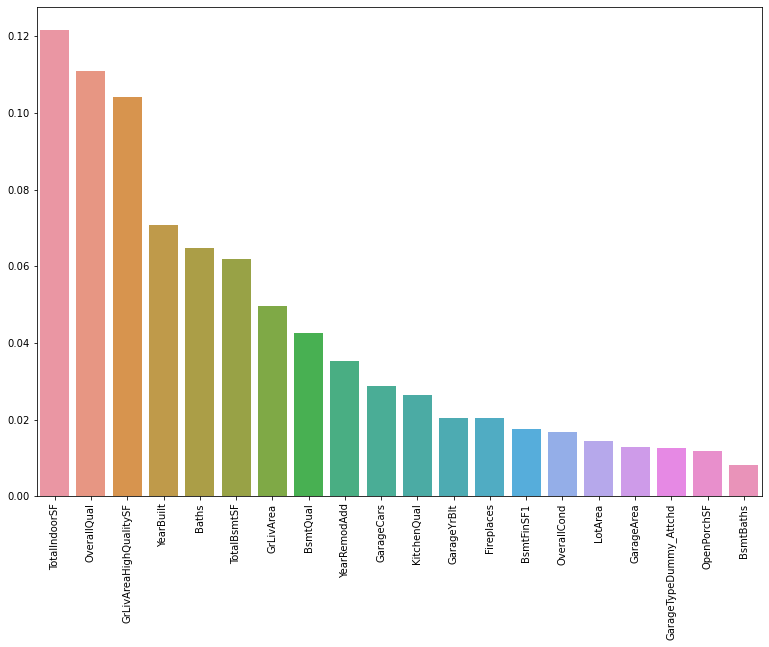

In [105]:
getFeatureImportance(20, X.columns.to_list(), gridGbr.best_estimator_.feature_importances_, sort='descending')

# Evaluating Errors

In [106]:

# train_indices = split_indices[2][0]
# test_indices = split_indices[2][1]
# train_data = X.iloc[test_indices]
# predictions = grid.predict(train_data)
# actuals = y.iloc[test_indices]


In [107]:
# split_results = pd.DataFrame(predictions, actuals).reset_index().rename(columns={'SalePrice':'Predictions',0:'Actuals'})
# split_results['AbsDifference'] = abs(split_results['Predictions'] - split_results['Actuals'])
# split_results['Difference'] = split_results['Predictions'] - split_results['Actuals']
# split_results_sorted = split_results.sort_values(by='AbsDifference', ascending=False)
# split_results_sorted



In [108]:
# train_data = train_data.reset_index()

In [109]:
# train_data_sorted = train_data.iloc[split_results_sorted.index]

In [110]:
# larger_errors = train_data_sorted.iloc[:int(len(train_data_sorted)/2)]
# smaller_errors = train_data_sorted.iloc[int(len(train_data_sorted)/2):]

In [111]:
# larger_errors.mean()[['TotalIndoorSF','OverallQual']]

In [112]:
# smaller_errors.mean()[['TotalIndoorSF','OverallQual']]

In [113]:
# split_results_sorted.iloc[:int(len(split_results_sorted)/2)]['Actuals'].mean()

In [114]:
# split_results_sorted.iloc[int(len(split_results_sorted)/2):]['Actuals'].mean()

In [115]:
# larger_errors.iloc[0,:60] - train_data_sorted.mean()[:60]

In [116]:
# split_results_sorted.head(50)

# Ridge Regression

In [153]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(trained.loc[:, trained.columns != 'SalePrice'])
X_Scaled = pd.DataFrame(X_Scaled, columns = trained.columns[trained.columns != 'SalePrice'])

In [154]:
model = Ridge()
params = {'alpha':[0.1,1,10,50,75,100,1000,2000]}
gridRidge = GridSearchCV(model, param_grid=params, cv=5)
gridRidge.fit(X_Scaled, y)
gridRidge.cv_results_

{'mean_fit_time': array([0.00817528, 0.00818882, 0.00759263, 0.00620899, 0.00589666,
        0.00562849, 0.00600486, 0.0061542 ]),
 'std_fit_time': array([1.26233720e-04, 6.20020625e-04, 7.78265213e-04, 4.49154245e-04,
        6.86466008e-05, 1.48142001e-04, 1.72355388e-04, 2.96878700e-04]),
 'mean_score_time': array([0.00434656, 0.00425839, 0.00385237, 0.00307021, 0.00296025,
        0.00294032, 0.00313835, 0.00313392]),
 'std_score_time': array([6.97339742e-05, 1.68204400e-04, 5.99789558e-04, 1.77699725e-04,
        9.73953640e-05, 1.26798935e-04, 1.42351139e-04, 1.95332464e-04]),
 'param_alpha': masked_array(data=[0.1, 1, 10, 50, 75, 100, 1000, 2000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 50},
  {'alpha': 75},
  {'alpha': 100},
  {'alpha': 1000},
  {'alpha': 2000}],
 'split0_test_score': array([0.90566655, 0.90713854, 0.9

In [155]:
gridRidge.best_params_

{'alpha': 100}

In [156]:
gridRidge.best_score_

0.9119955296291771

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('SaleConditionDummy_Partial', 3.838404705192033e-09),
 ('ElectricalDummy_FuseF', 8.87284763217977e-07),
 ('NeighborhoodDummy_Timber', 2.3879850579167083e-06),
 ('NeighborhoodDummy_Edwards', 1.667537218308368e-05),
 ('HeatingDummy_Wall', 0.0003648109026586077),
 ('OpenPorchSF', 0.0003788681539416139),
 ('MSSubClassDummy_40', 0.00041707347331643163),
 ('Condition1Dummy_PosA', 0.0008711731069293016),
 ('FunctionalDummy_Min1', 0.0012274085001520163),
 ('NeighborhoodDummy_OldTown', 0.0017141234280260154),
 ('Exterior1stDummy_AsphShn', 0.0020540089768261716),
 ('Exterior1stDummy_CBlock', 0.0024732569713661334),
 ('NeighborhoodDummy_Mitchel', 0.0038813095371281747),
 ('AlleyDummy_No_Alley_Access', 0.004169007757419241),
 ('Exterior1stDummy_BrkFace', 0.006550367919215594),
 ('FunctionalDummy_Typ', 0.009181860145979437),
 ('NeighborhoodDummy_MeadowV', 0.012937317511808821),
 ('GarageTypeDummy_Attchd', 0.013761219093015642),
 ('MSZoningDummy_RH', 0.016306856821531435),
 ('LotConfigDummy_FR2', 

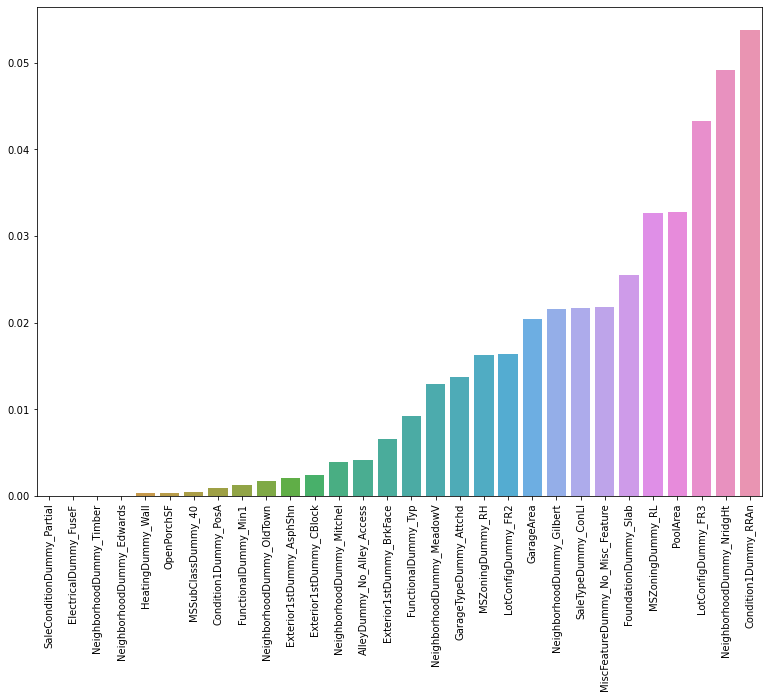

In [157]:
pvals = stats.coef_pval(gridRidge.best_estimator_, X_Scaled, y)
pvals_sorted = getFeatureImportance(30, X_Scaled.columns, pvals, sort='ascending')
pvals_sorted

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('OverallQual', 0.05656633788948864),
 ('OverallCond', 0.038753322371807675),
 ('TotalBsmtSF', 0.0351807955811563),
 ('TotalIndoorSF', 0.03510509479119889),
 ('GrLivArea', 0.033874756625686335),
 ('YearBuilt', 0.03346987792520887),
 ('1stFlrSF', 0.03215903947517269),
 ('LotArea', 0.0318146233161877),
 ('GrLivAreaHighQualitySF', 0.027756715994674844),
 ('MSZoningDummy_RL', 0.025455845946691903),
 ('SaleConditionDummy_Normal', 0.024572716185419355),
 ('YearRemodAdd', 0.020105456381923195),
 ('MSZoningDummy_RM', 0.018446503933404284),
 ('CentralAirDummy_Y', 0.018237751525320565),
 ('MSZoningDummy_FV', 0.018083456658495926),
 ('NeighborhoodDummy_Crawfor', 0.018001947368898954),
 ('BsmtUnfSF', -0.017446239654383605),
 ('SaleTypeDummy_New', 0.017324394344329655),
 ('Condition1Dummy_Norm', 0.016703834199969226),
 ('2ndFlrSF', 0.01579317226637024),
 ('FunctionalDummy_Typ', 0.015683611054591227),
 ('NeighborhoodDummy_StoneBr', 0.01539556777522257),
 ('GarageCars', 0.015054227294041626),
 ('Nei

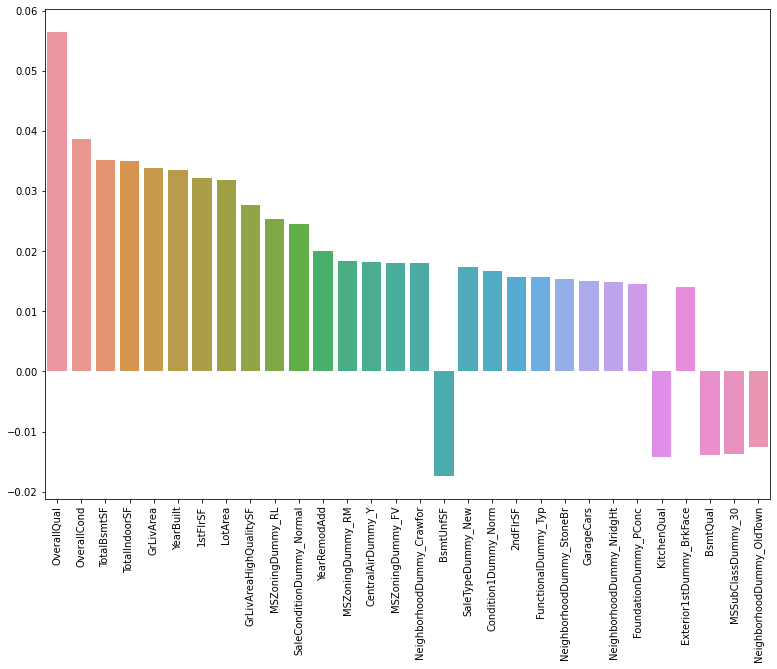

In [158]:
coefMagSorted = getFeatureImportance(30, X_Scaled.columns, gridRidge.best_estimator_.coef_, sort='descending')
coefMagSorted

In [159]:
#col_subset = [val[0] for val in pvals_sorted if val[1] < 0.05]
col_subset = [val[0] for val in coefMagSorted[:51]]
gridRidge = GridSearchCV(model, param_grid=params, cv=5)
gridRidge.fit(X_Scaled[col_subset], y)
gridRidge.cv_results_

{'mean_fit_time': array([0.00356021, 0.00308056, 0.00296898, 0.00350952, 0.02308273,
        0.00298228, 0.00272574, 0.0025208 ]),
 'std_fit_time': array([3.37738229e-04, 3.71178449e-05, 6.02351977e-05, 4.79711476e-04,
        3.93090736e-02, 1.46318987e-04, 2.49526867e-04, 3.23876595e-04]),
 'mean_score_time': array([0.00216579, 0.00187602, 0.00182104, 0.00212007, 0.00195961,
        0.00183897, 0.00151396, 0.00160837]),
 'std_score_time': array([2.13951578e-04, 3.77745930e-05, 4.48100092e-05, 3.18103047e-04,
        1.43645435e-04, 1.34804268e-04, 8.16382258e-05, 2.19496799e-04]),
 'param_alpha': masked_array(data=[0.1, 1, 10, 50, 75, 100, 1000, 2000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 50},
  {'alpha': 75},
  {'alpha': 100},
  {'alpha': 1000},
  {'alpha': 2000}],
 'split0_test_score': array([0.92470283, 0.92548525, 0.9

In [160]:
gridRidge.best_params_

{'alpha': 50}

In [161]:
gridRidge.best_score_

0.9224069294322671

In [162]:
stats.summary(gridRidge.best_estimator_, X_Scaled[col_subset], y)

Residuals:
    Min      1Q  Median      3Q     Max
-0.4476 -0.0568 -0.0013  0.0483  0.7133


Coefficients:
             Estimate  Std. Error    t value   p value
_intercept  12.022224    0.002733  4399.6693  0.000000
x1           0.067955    0.005130    13.2465  0.000000
x2           0.040471    0.003436    11.7792  0.000000
x3           0.036471    0.012094     3.0156  0.002609
x4           0.037968    0.048105     0.7893  0.430088
x5           0.048033    0.016446     2.9207  0.003547
x6           0.039880    0.006434     6.1986  0.000000
x7           0.038869    0.010804     3.5976  0.000332
x8           0.038029    0.004360     8.7221  0.000000
x9           0.020995    0.031481     0.6669  0.504938
x10          0.022088    0.007884     2.8015  0.005155
x11          0.024157    0.003557     6.7921  0.000000
x12          0.016393    0.004150     3.9505  0.000082
x13          0.019954    0.006887     2.8972  0.003821
x14          0.013112    0.003294     3.9805  0.000072
x15          

# Lasso Regression

In [164]:
model = Lasso()
params = {'alpha':[0.005,0.006,0.0007,0.0008,0.001,0.01,0.1,1,10]}
gridLasso = GridSearchCV(model, param_grid=params, cv=5)
gridLasso.fit(X_Scaled, y)
gridLasso.cv_results_

{'mean_fit_time': array([0.02369814, 0.01676869, 0.05370588, 0.04223437, 0.04260745,
        0.01378312, 0.00591679, 0.00489779, 0.00476737]),
 'std_fit_time': array([0.00354094, 0.00402443, 0.0281617 , 0.00639332, 0.00531142,
        0.0020759 , 0.00052141, 0.00013754, 0.00013794]),
 'mean_score_time': array([0.00432959, 0.00297246, 0.00282483, 0.00292511, 0.0030755 ,
        0.00316257, 0.00283322, 0.00273576, 0.00280795]),
 'std_score_time': array([1.61727433e-04, 2.45473463e-04, 2.60315070e-04, 3.26138490e-05,
        2.48965014e-04, 1.89062379e-04, 2.50886800e-04, 1.53966620e-04,
        1.00563204e-04]),
 'param_alpha': masked_array(data=[0.005, 0.006, 0.0007, 0.0008, 0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.005},
  {'alpha': 0.006},
  {'alpha': 0.0007},
  {'alpha': 0.0008},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'

In [165]:
gridLasso.best_params_

{'alpha': 0.005}

In [166]:
gridLasso.best_score_

0.9172139509766482

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('NeighborhoodDummy_Edwards', 0.00024383279630280086),
 ('ElectricalDummy_FuseF', 0.00030814563609471435),
 ('SaleConditionDummy_Partial', 0.0025907102507909396),
 ('MSSubClassDummy_40', 0.009191603485601663),
 ('NeighborhoodDummy_Timber', 0.01401288508712617),
 ('OpenPorchSF', 0.02018049144648293),
 ('GarageArea', 0.029335941723026115),
 ('HeatingDummy_Wall', 0.035304495167288064),
 ('Condition1Dummy_PosA', 0.047363571133633986),
 ('FunctionalDummy_Typ', 0.06105797536174462),
 ('FoundationDummy_Slab', 0.07817615592745053),
 ('GarageTypeDummy_Attchd', 0.0817977315874372),
 ('FunctionalDummy_Min1', 0.08911931737139733),
 ('FireplaceQu', 0.10021448519459053),
 ('NeighborhoodDummy_MeadowV', 0.1012784766851813),
 ('SaleTypeDummy_Oth', 0.14310768921518036),
 ('NeighborhoodDummy_OldTown', 0.19495135606215053),
 ('AlleyDummy_No_Alley_Access', 0.2064848668387147),
 ('Exterior1stDummy_CBlock', 0.21428504238958967),
 ('NeighborhoodDummy_Mitchel', 0.23507413770978625),
 ('TotalOutdoorSF', 0.2612

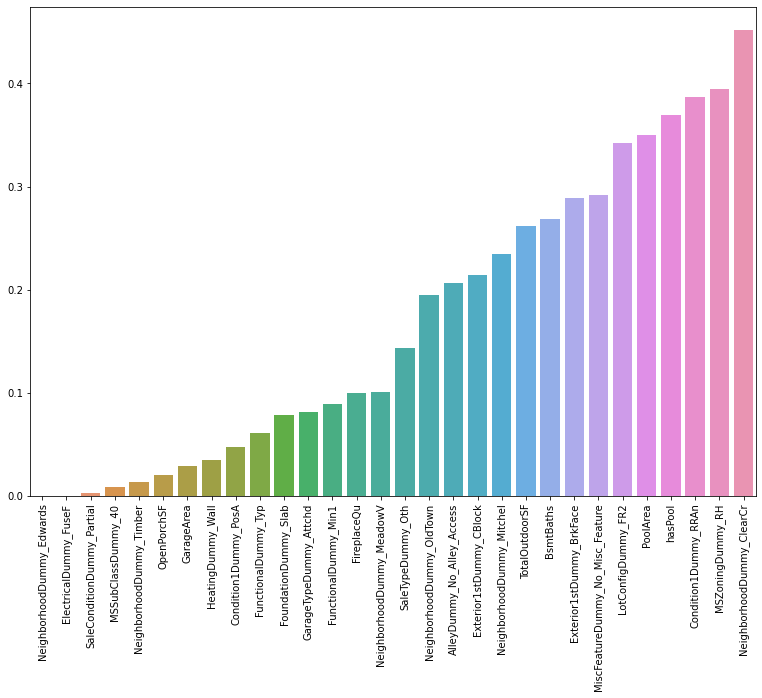

In [167]:
pvals = stats.coef_pval(gridLasso.best_estimator_, X_Scaled, y)
pvals_sorted = getFeatureImportance(30, X_Scaled.columns, pvals, sort='ascending')
pvals_sorted

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('TotalIndoorSF', 0.09942454393250164),
 ('OverallQual', 0.08380565614391956),
 ('GrLivArea', 0.06459377508399225),
 ('YearBuilt', 0.04671446879911464),
 ('OverallCond', 0.039009195431917665),
 ('LotArea', 0.038727877337790616),
 ('SaleTypeDummy_New', 0.022763963332293826),
 ('BsmtFinSF1', 0.019212139755640078),
 ('NeighborhoodDummy_Crawfor', 0.0169205334534857),
 ('YearRemodAdd', 0.016446579767606506),
 ('GarageCars', 0.015456901127736069),
 ('CentralAirDummy_Y', 0.01463299757796779),
 ('SaleConditionDummy_Normal', 0.013601868613189143),
 ('KitchenQual', -0.013000129644641307),
 ('FoundationDummy_PConc', 0.012945178900743908),
 ('BsmtFullBath', 0.01272913418427397),
 ('FunctionalDummy_Typ', 0.012348867839323714),
 ('1stFlrSF', 0.011899044806803729),
 ('BsmtQual', -0.011573802341118695),
 ('Condition1Dummy_Norm', 0.011067732824589055),
 ('HeatingQC', -0.01077344601927722),
 ('MSSubClassDummy_30', -0.010697919719213989),
 ('Fireplaces', 0.010622307784577035),
 ('KitchenAbvGr', -0.00968

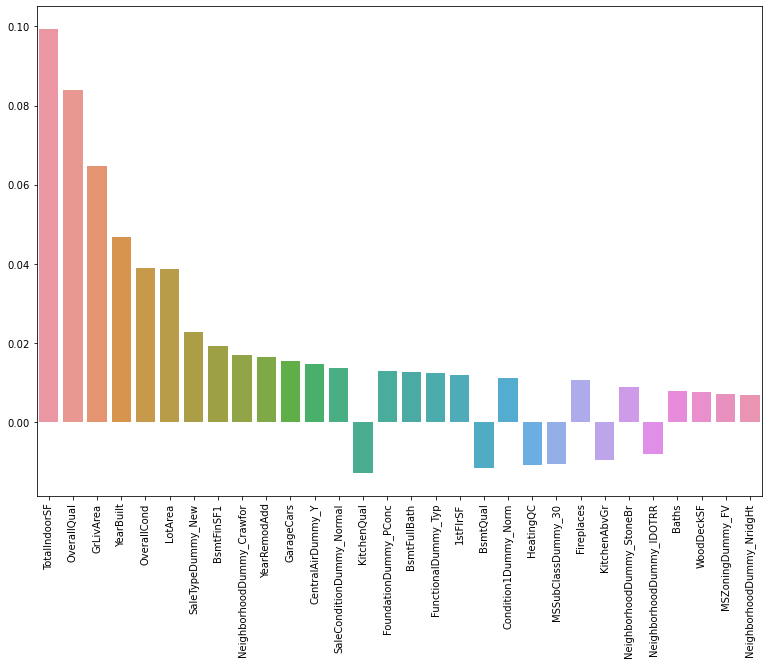

In [168]:
coefMagSorted = getFeatureImportance(30, X_Scaled.columns, gridLasso.best_estimator_.coef_, sort='descending')
coefMagSorted

In [169]:
stats.summary(gridLasso.best_estimator_, X_Scaled, y)

Residuals:
    Min      1Q  Median      3Q     Max
-0.4381 -0.0587 -0.0049  0.0505  0.7339


Coefficients:
             Estimate                  Std. Error             t value   p value
_intercept  12.022224  1.837357e+01-1.780000e-04j  0.654300+0.000000j  0.513008
x1           0.000000  3.964077e+04+4.841281e+04j  0.000000+0.000000j  1.000000
x2           0.038728  2.870131e+04+1.055972e+05j  0.000000-0.000000j  1.000000
x3           0.000000 -4.846345e+03-9.168232e+03j -0.000000-0.000000j  1.000000
x4           0.083806 -5.911770e+03-2.198170e+04j -0.000000+0.000000j  0.999997
x5           0.039009  5.123611e+02-2.388848e+02j  0.000100+0.000000j  0.999945
x6           0.046714  8.828554e+02+7.471137e+02j  0.000000-0.000000j  0.999968
x7           0.016447  1.998746e+02-1.639790e+03j  0.000000+0.000000j  0.999992
x8           0.000000  9.165766e+03+1.112340e+04j  0.000000+0.000000j  1.000000
x9          -0.004459  5.149971e+03+5.740133e+03j -0.000000+0.000000j  1.000000
x10          

# SVR

In [170]:
model = SVR()
params = {'kernel':['linear'],'C':[0.01,0.1],'epsilon':[0.001,0.01,0.1,1]}
gridSVR = GridSearchCV(model, param_grid=params, cv=5)
gridSVR.fit(X_Scaled, y)
gridSVR.cv_results_

{'mean_fit_time': array([0.53594851, 0.52109923, 0.19481726, 0.00706983, 2.74594855,
        3.04626389, 1.29632835, 0.00898547]),
 'std_fit_time': array([3.82751062e-02, 4.63154992e-02, 2.15547690e-02, 5.99306670e-04,
        1.89831033e-01, 5.26354229e-01, 2.77584514e-01, 4.73190127e-04]),
 'mean_score_time': array([0.08180981, 0.07085018, 0.02427759, 0.00321221, 0.07738781,
        0.08205991, 0.030549  , 0.0039402 ]),
 'std_score_time': array([0.01204708, 0.01141795, 0.00352142, 0.00028349, 0.01019581,
        0.01741073, 0.00431353, 0.0002366 ]),
 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_epsilon': masked_array(data=[0.001, 0.01, 0.1, 1, 0.001, 0.01, 0.1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_arra

In [171]:
gridSVR.best_params_

{'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}

In [172]:
gridSVR.best_score_

0.9180220485628364

# Predictions on Test Set

In [173]:
tested_scaled = scaler.transform(tested)
tested_scaled = pd.DataFrame(tested_scaled, columns = tested.columns)

In [174]:
gbr_predictions = gridGbr.predict(tested)
ridge_predictions = gridRidge.predict(tested_scaled[col_subset])
lasso_predictions = gridLasso.predict(tested_scaled)
svr_predictions = gridSVR.predict(tested_scaled)

In [175]:
gbr_predictions = pd.Series(np.exp(np.array(gbr_predictions)))
ridge_predictions = pd.Series(np.exp(np.array(ridge_predictions)))
lasso_predictions = pd.Series(np.exp(np.array(lasso_predictions)))
svr_predictions = pd.Series(np.exp(np.array(svr_predictions)))

In [176]:
results = pd.concat([tested.reset_index()['Id'], pd.concat([gbr_predictions, ridge_predictions, lasso_predictions, svr_predictions], axis=1)],axis=1)

In [177]:
final_pred_log_avg = np.exp((np.log(results[0]) + np.log(results[1]) + np.log(results[2]) + np.log(results[3]))/4)
final_pred_log_avg = pd.DataFrame(final_pred_log_avg, columns=['SalePrice'])
final_pred_avg = (results[0] + results[1] + results[2] + results[3])/4
final_pred_avg = pd.DataFrame(final_pred_avg, columns=['SalePrice'])

In [178]:
results = pd.concat([results, final_pred_log_avg],axis=1)

In [179]:
results

Id              0              1              2              3  \
0     1461  120627.396618  115860.237272  121182.539232  125376.254448   
1     1462  158556.135247  165555.089699  158455.597119  138630.935757   
2     1463  181979.863003  187547.557254  179275.261673  192648.001207   
3     1464  199023.540932  201437.907744  194009.964142  196103.075220   
4     1465  186307.160909  206592.649591  199988.432650  203164.179484   
...    ...            ...            ...            ...            ...   
1454  2915   85107.034625   83808.308872   87652.486678   80975.711086   
1455  2916   83341.356474   78991.372842   85338.523819   77484.365016   
1456  2917  164866.670307  172585.004690  168990.929625  175011.803096   
1457  2918  113155.646186  125427.514978  123052.719579  125134.335533   
1458  2919  217116.537164  232248.884517  226240.032027  221721.879123   

          SalePrice  
0     120714.357464  
1     154961.328818  
2     185291.247192  
3     197623.470871  
4     198860.765636  
...             ...  
1454   84351.514963  
1455   81226.896062  
1456  170320.398660  
1457  121586.172952  
1458  224262.229919  

[1459 rows x 6 columns]

In [152]:
#results[['Id','SalePrice']].to_csv('submission9.csv', index=False)